#pre-modeling

##Dependencies

In [5916]:
!pip install tensorflow
!pip install shap

In [5917]:
from google.colab import drive
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import defaultdict
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

## setup

In [5918]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5919]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [5920]:
import pandas as pd

In [5921]:
Combo=pd.read_csv("data.csv")

In [5922]:
display(Combo)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


In [5923]:
Combo.isna().sum().sum()

0

##PFAS dataframe

In [5924]:
!pip install xport

In [5925]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


In [5926]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [5927]:
display(df_PFAS)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


##making the ouside DF


In [5928]:
DF=Combo.copy()
for col in DF.columns:
  if (col != 'SEQN') and (col != 'LBDMPAHL') and (col != 'LBXMPAH') and (col in df_PFAS):
    DF=DF.drop(columns=col)
DF


,LBXMPAH,LBDMPAHL,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.20,0.0,29.1,0.0,0.20,0.0,0.20,0.0,63.5,0.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.20,0.0,6.0,0.0,1.70,0.0,0.20,0.0,23.5,0.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.07,1.0,13.4,0.0,1.20,0.0,0.07,1.0,6.5,0.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.07,1.0,24.6,0.0,1.50,0.0,0.10,0.0,77.9,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.07,1.0,11.6,0.0,2.70,0.0,0.07,1.0,9.5,0.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,0.20,0.0,3.6,0.0,2.60,0.0,0.07,1.0,1.7,0.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.07,1.0,11.0,0.0,0.50,0.0,0.07,1.0,1.2,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.07,1.0,1.4,0.0,0.14,1.0,0.07,1.0,1.2,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.07,1.0,9.1,0.0,2.00,0.0,0.20,0.0,1.2,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


##making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

In [5929]:
d_p = {}
for col in DF.columns:
  if col.endswith('LC'):
    p = round(((DF[col][DF[col]==0].count())/len(DF))*100,2)
    d_p[col] = p


In [5930]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22,
 'URXTLC': 0.0}

In [5931]:
d_p.pop("URXTLC")

0.0

In [5932]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22}

In [5933]:
len(d_p)

25

In [5934]:
type(d_p)
import numpy as np
L2=np.array(list(d_p.items()))

##Decide which we can treat as binary


In [5935]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p.items() if (val <= 30 or val >= 70)}

In [5936]:
binary_variables

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMIBLC': 97.18,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTRSLC': 76.22}

In [5937]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
bin = list(binary_variables.keys())
print(bin)
for i in bin:
    binary_cols = DF[i]
    binary_dataset[i] = binary_cols
print(binary_dataset)


['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']
{'URDBP3LC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDBP3LC, Length: 2124, dtype: float64, 'URDBPHLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    1.0
2122    0.0
2123    0.0
Name: URDBPHLC, Length: 2124, dtype: float64, 'URDTRSLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    1.0
2121    1.0
2122    1.0
2123    0.0
Name: URDTRSLC, Length: 2124, dtype: float64, 'URDMPBLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDMPBLC, Length: 2124, dtype: float64, 'URDPPBLC'

In [5938]:
binary_list = []
for key in binary_dataset:
  binary_list.append(key)


In [5939]:
len(binary_list)

19

In [5940]:
print(binary_list)

['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']


In [5941]:
binary_df = DF.copy()
for i in binary_df.columns:
  if i not in binary_list:
    binary_df = binary_df.drop(columns=i)
binary_df.head()

,URDBP3LC,URDBPHLC,URDTRSLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URDCNPLC,URDCOPLC,URDECPLC,URDMBPLC,URDMC1LC,URDMEPLC,URDMHHLC,URDMCHLC,URDMIBLC,URDMOHLC,URDMZPLC,URDBPSLC
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5942]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

In [5943]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [5944]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

##which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [5945]:
intersection_set = set.intersection(set(DF.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [5946]:
print(len(intersection_list))

19


In [5947]:
intersection_list

['URDPPBLC',
 'URDECPLC',
 'URDCOPLC',
 'URDMPBLC',
 'URD14DLC',
 'URDMEPLC',
 'URDMC1LC',
 'URDTRSLC',
 'URDMIBLC',
 'URDBPHLC',
 'URDMBPLC',
 'URDMZPLC',
 'URDBP3LC',
 'URDCNPLC',
 'URDBPSLC',
 'URDDCBLC',
 'URDMHHLC',
 'URDMCHLC',
 'URDMOHLC']

In [5948]:
#percentage of what is binary in df
len(intersection_list)/len(DF)*100

0.8945386064030132

In [5949]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop=[]
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [5950]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

19

In [5951]:
print(cols_to_drop)

['URXPPB', 'URXECP', 'URXCOP', 'URXMPB', 'URX14D', 'URXMEP', 'URXMC1', 'URXTRS', 'URXMIB', 'URXBPH', 'URXMBP', 'URXMZP', 'URXBP3', 'URXCNP', 'URXBPS', 'URXDCB', 'URXMHH', 'URXMCH', 'URXMOH']


In [5952]:
type(cols_to_drop)

list

In [5953]:
#particular naming convention
cols_to_drop = ['URXMHNC' if item == 'URXMCH' else item for item in cols_to_drop]

In [5954]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
DF=DF.drop(columns=cols_to_drop)

In [5955]:
display(DF)

,LBXMPAH,LBDMPAHL,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.20,0.0,0.0,0.0,0.20,0.0,0.0,0.07,1.0,2.20,...,0.57,1.0,1.0,0.64,1.0,0.0,0.0,0.14,1.0,1.0
1,0.20,0.0,0.0,0.0,0.20,0.0,0.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.60,0.0,0.0
2,0.07,1.0,0.0,0.0,0.07,1.0,0.0,0.07,1.0,1.10,...,7.50,0.0,0.0,138.70,0.0,0.0,0.0,1.60,0.0,0.0
3,0.07,1.0,0.0,0.0,0.10,0.0,0.0,0.07,1.0,36.40,...,5.70,0.0,0.0,3.50,0.0,0.0,0.0,0.14,1.0,0.0
4,0.07,1.0,0.0,0.0,0.07,1.0,0.0,83.10,0.0,107.10,...,2.30,0.0,0.0,0.64,1.0,0.0,0.0,0.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,0.20,0.0,0.0,0.0,0.07,1.0,0.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.50,0.0,0.0
2120,0.07,1.0,0.0,0.0,0.07,1.0,1.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.30,0.0,0.0
2121,0.07,1.0,0.0,1.0,0.07,1.0,1.0,0.07,1.0,0.71,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.14,1.0,0.0
2122,0.07,1.0,0.0,0.0,0.20,0.0,1.0,0.07,1.0,0.71,...,4.80,0.0,0.0,3.20,0.0,0.0,0.0,0.14,1.0,1.0


##taking log of continuous values

In [5956]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = DF.columns[DF.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in DF.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    DF[col] = np.log(DF[col])

In [5957]:
display(DF)

,LBXMPAH,LBDMPAHL,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,0.788457,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.095310,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,-2.659260,1.0,0.0,0.0,-2.302585,0.0,0.0,-2.659260,1.0,3.594569,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,4.420045,0.0,4.673763,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,-1.609438,0.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,-2.659260,1.0,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,-2.659260,1.0,0.0,1.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,-2.659260,1.0,0.0,0.0,-1.609438,0.0,1.0,-2.659260,1.0,-0.342490,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


##Splitting the data
We are trying to predict detection level of 2-(N-methyl-PFOSA) acetate (ug/L)




In [5958]:
from sklearn.model_selection import train_test_split
leftover, test = train_test_split(df_PFAS, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
train, dev =train_test_split(leftover, test_size=0.2)
X_train=train.drop(columns=['LBDMPAHL','LBXMPAH'])
X_dev=dev.drop(columns=['LBDMPAHL','LBXMPAH'])
X_test=test.drop(columns=['LBDMPAHL','LBXMPAH'])
Y_train=train['LBXMPAH']
Y_test=test['LBXMPAH']
Y_dev=dev['LBXMPAH']

In [5959]:
include=list(X_train.columns)

In [5960]:
Y_test

2199    0.30
861     0.20
1312    0.07
2123    0.07
1885    0.10
        ... 
1122    0.10
513     0.07
1705    0.07
2331    0.07
1880    0.07
Name: LBXMPAH, Length: 434, dtype: float64

##Scaled training, development, testing

In [5961]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_dev_scaled = sc.fit_transform(X_dev)

#Lasso Regression

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [5962]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

In [5963]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.0
R squared dev set -0.0005957098837037211
MSE training set 0.09072112452170714
MSE dev set 0.11132761210015625
RMSE training set 0.30119947629719934
RMSE dev set 0.33365792677554695


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


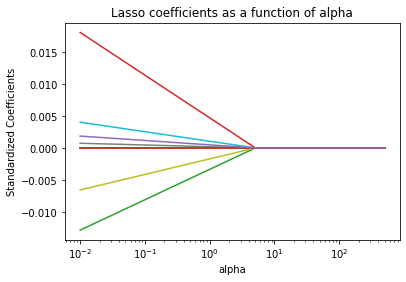

In [5964]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [5965]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso.fit(X_train_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [5966]:
model_lasso.alpha_


0.003660180965637744

In [5967]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso.alpha_)
lasso_best.fit(X_train_scaled, Y_train)

Lasso(alpha=0.003660180965637744)

In [5968]:
Lasso(alpha=model_lasso.alpha_)

Lasso(alpha=0.003660180965637744)

In [5969]:
print(list(zip(lasso_best.coef_, X_train_scaled)))

[(0.005508213999568035, array([ 0.4008722 ,  0.55638936, -0.4927794 , -0.07133625, -0.08941021,
       -0.06706925,  0.08521833, -0.23252805,  0.39840954,  0.27040203,
       -0.10097846,  0.098224  , -1.11875975, -0.14101067,  0.44933997])), (0.0, array([-0.53348996,  0.20318044, -0.4927794 ,  0.90064811, -0.08941021,
       -0.06706925,  0.08521833, -0.23252805,  0.39840954,  0.62973482,
       -0.10097846,  0.13992102, -1.11875975,  0.52301738, -2.2254864 ])), (-0.01739975937503064, array([ 1.4420959 , -0.0793867 , -0.4927794 , -0.48790098, -0.08941021,
       -0.06706925,  0.08521833,  3.82095675, -2.50998008, -0.32848596,
       -0.10097846, -0.0810732 ,  0.89384696, -0.14101067,  0.44933997])), (0.022097724281079794, array([ 1.6257219 , -0.17122102,  2.02930559, -0.25647613, -0.08941021,
       -0.06706925,  0.08521833, -0.23252805,  0.39840954, -0.44826355,
       -0.10097846, -0.0810732 ,  0.89384696, -0.14101067,  0.44933997])), (-0.0003999903243017731, array([ 0.51212994, -0.

In [5970]:
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_test_scaled)

In [5971]:
y_pred

array([0.19258894, 0.18843193, 0.19448818, 0.19432659, 0.2189599 ,
       0.28135903, 0.24731835, 0.25186111, 0.16993973, 0.15446972,
       0.15117104, 0.15695774, 0.2634261 , 0.13585632, 0.14271501,
       0.14464026, 0.20663144, 0.12197706, 0.24355077, 0.20826666,
       0.13896994, 0.22528447, 0.19881341, 0.18801161, 0.18150589,
       0.24541203, 0.26026181, 0.13339688, 0.1863405 , 0.22173657,
       0.18900895, 0.10098156, 0.18434736, 0.15244509, 0.19321733,
       0.19868692, 0.16772749, 0.21185323, 0.18748056, 0.21130963,
       0.16371829, 0.17977902, 0.17257169, 0.12902655, 0.18727412,
       0.19643888, 0.15631706, 0.18772251, 0.19342333, 0.19678946,
       0.19254312, 0.13218745, 0.17841998, 0.18233196, 0.22080168,
       0.19169307, 0.18714621, 0.17759811, 0.21973157, 0.1942284 ,
       0.20057088, 0.19961411, 0.18242644, 0.22109843, 0.19984745,
       0.18317081, 0.17977894, 0.23143222, 0.2079789 , 0.13796954,
       0.1963626 , 0.19800925, 0.22727921, 0.14958919, 0.17930

In [5972]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.023324636981076785
R squared test set 0.0227871177626513
MSE training set 188033.4281299095
MSE test set 0.04446452052537786
RMSE training set 433.6282141765103
RMSE test set 0.21086611990876547


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(2.2537020388468472e-05,
 0.04496726747279647,
 0.05595084065218578,
 0.18296074332793832)

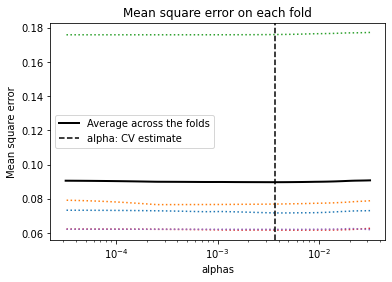

In [5973]:
plt.semilogx(model_lasso.alphas_, model_lasso.mse_path_, ":")
plt.plot(
    model_lasso.alphas_ ,
    model_lasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

#ymin, ymax = 0.125, 0.35
#plt.ylim(ymin, ymax);

In [5974]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
455,0.07,0.159237
753,0.07,0.184740
2001,0.07,0.205638
564,0.07,0.294038
1384,0.07,0.174510
...,...,...
860,1.10,0.176761
1081,1.20,0.210229
41,1.30,0.164507
782,1.30,0.245605


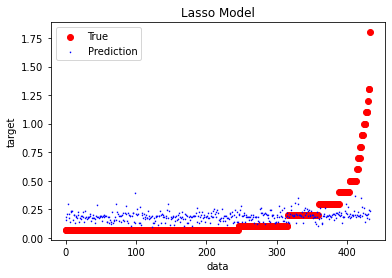

In [5975]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso Model")
plt.legend()
plt.show()

#Decision Tree Regression

[Python | Decision Tree Regression using sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

In [5976]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_dev)

to be able to plot the results we need to make sure the results are on the same index so they match up

In [5977]:
list(X_dev.index)==list(Y_dev.index)

True

In [5978]:
y_pred_series=pd.Series(y_pred,index=X_dev.index)
list(y_pred_series.index)==list(Y_dev.index)

True

In [5979]:
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=test_Df.sort_values(by=['Actual'])
dev_Df

,Actual,Prediction
455,0.07,0.159237
1465,0.07,0.143705
2078,0.07,0.187723
411,0.07,0.156317
1900,0.07,0.162660
...,...,...
860,1.10,0.176761
1081,1.20,0.210229
782,1.30,0.245605
41,1.30,0.164507


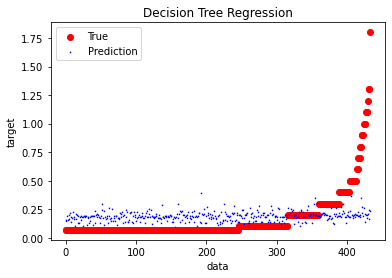

In [5980]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [5981]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 1.0
R squared dev set -0.9958411168080818
MSE training set 8.20637777312802e-35
MSE dev set 0.22205994236311238
RMSE training set 9.058905989758377e-18
RMSE dev set 0.47123236557256165


[Train a regression model using a decision tree
](https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1)

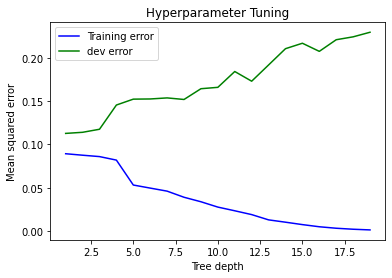

In [5982]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, Y_train)
    training_error.append(mse(Y_train, model_1.predict(X_train)))
    
dev_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, Y_train)
    y_pred = reg.predict(X_dev)
    dev_error.append(mse(Y_dev, model_2.predict(X_dev)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, dev_error, color='green', label='dev error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning')
plt.legend()

lowest for development at around 4 or 5 and training as it goes on, but this is overfitting

In [5983]:
reg = DecisionTreeRegressor(random_state = 0,max_depth=4) 
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)

In [5984]:
y_pred_series=pd.Series(y_pred,index=X_test.index)
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

,Actual,Prediction
455,0.07,0.164758
753,0.07,0.191534
2001,0.07,0.246609
564,0.07,0.334167
1384,0.07,0.116096
...,...,...
860,1.10,0.191534
1081,1.20,0.191534
41,1.30,0.191534
782,1.30,0.191534


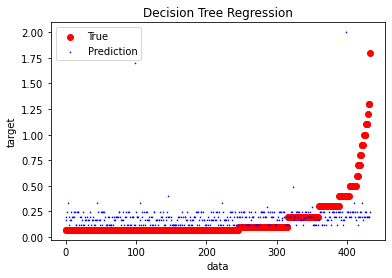

In [5985]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [5986]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.09711760617087128
R squared test set -0.24340034158010249
MSE training set 0.0819105060790294
MSE test set 0.05657641340428213
RMSE training set 0.28620011544202667
RMSE test set 0.2378579689736758


#Random Forest

In [5987]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
reg = RandomForestRegressor(random_state=0)
 
#fit the regressor with x and y data
reg.fit(X_train, Y_train) 
y_pred = reg.predict(X_dev)

In [5988]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.8582058399264061
R squared dev set -0.22853064380028298
MSE training set 0.012863725652487383
MSE dev set 0.1366879565994236
RMSE training set 0.11341836558726891
RMSE dev set 0.36971334382116045


In [5989]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.4559
490,0.07,0.2240
1467,0.07,0.1635
2247,0.07,0.2135
116,0.07,0.1525
...,...,...
1635,1.70,0.2488
1187,1.80,0.1294
68,2.90,0.1806
1824,3.00,0.3328


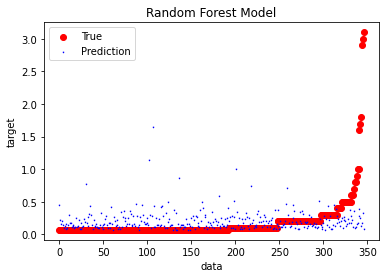

In [5990]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_dev)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

repeat process with most important features [Random Forest in Python
](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [5991]:
importances = list(reg.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SEQN                 Importance: 0.49
Variable: LBXPFHS              Importance: 0.17
Variable: LBXPFNA              Importance: 0.12
Variable: LBXPFDE              Importance: 0.07
Variable: LBXPFUA              Importance: 0.06
Variable: LBXPFHP              Importance: 0.03
Variable: LBXPFDO              Importance: 0.02
Variable: LBDPFDEL             Importance: 0.01
Variable: LBDPFHPL             Importance: 0.01
Variable: LBDPFUAL             Importance: 0.01
Variable: LBDPFDOL             Importance: 0.01
Variable: LBDPFHSL             Importance: 0.0
Variable: LBXPFBS              Importance: 0.0
Variable: LBDPFBSL             Importance: 0.0
Variable: LBDPFNAL             Importance: 0.0


In [5992]:
#make a list with everying above 0 importance in order of highest to lowest
include=[]
for i,j in feature_importances:
  if j >0:
    include.append(i)
print(include)

['SEQN', 'LBXPFHS', 'LBXPFNA', 'LBXPFDE', 'LBXPFUA', 'LBXPFHP', 'LBXPFDO', 'LBDPFDEL', 'LBDPFHPL', 'LBDPFUAL', 'LBDPFDOL']


In [5993]:
reg_important = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg_important.fit(X_train[include], Y_train) 
y_pred = reg_important.predict(X_dev[include])

In [5994]:
pred_train = reg_important.predict(X_train[include])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg_important.predict(X_dev[include])
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.8590920877449393
R squared dev set -0.25474868167597764
MSE training set 0.012783324253785148
MSE dev set 0.1396050104322766
RMSE training set 0.11306336388850788
RMSE dev set 0.3736375388424945


In [5995]:
pred_dict={}
R_train_dict={}
R_dev_dict={}
mse_train_dict={}
mse_dev_dict={}
rmse_train_dict={}
rmse_dev_dict={}
#making a loop to go through adding one at a time and evaulating
for i in range(1,len(include)+1):
  #used is a list of what will be included
  used=include[:i]
  #fit the regression
  rf = RandomForestRegressor(random_state = 0)
  rf.fit(X_dev[used], Y_dev)
  y_pred = rf.predict(X_dev[used])
  pred_dict[i]=y_pred
  pred_train = rf.predict(X_train[used])
  #R squared test
  R_train=metrics.r2_score(Y_train,pred_train)
  R_train_dict[i]=R_train
  R_dev=metrics.r2_score(Y_dev,y_pred)
  R_dev_dict[i]=R_dev
  #MSE
  mse_train = mean_squared_error(Y_train, pred_train)
  mse_train_dict[i]=mse_train
  mse_dev = mean_squared_error(Y_dev, y_pred)
  mse_dev_dict[i]=mse_dev
  #RMSE
  rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
  rmse_train_dict[i]=rmse_train
  rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
  rmse_dev_dict[i]=rmse_dev

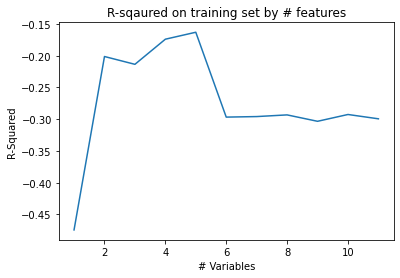

In [5996]:
# Make a graph by #vars
plt.plot([int(key) for key in R_train_dict.keys()], 
         [float(value) for value in R_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on training set by # features');

highest at around 21 but this is overfitting

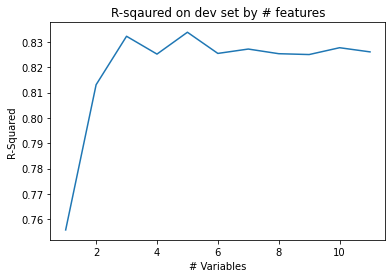

In [5997]:
#Make a graph by #vars
plt.plot([int(key) for key in R_dev_dict.keys()], 
         [float(value) for value in R_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('R-Squared'); plt.xlabel('# Variables'); plt.title('R-sqaured on dev set by # features');

levels off around 3-4

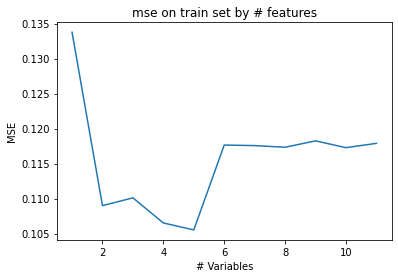

In [5998]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_train_dict.keys()], 
         [float(value) for value in mse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on train set by # features');

lowest at end but overfitting

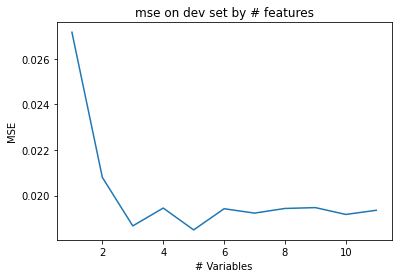

In [5999]:
#Make a graph by #vars
plt.plot([int(key) for key in mse_dev_dict.keys()], 
         [float(value) for value in mse_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('MSE'); plt.xlabel('# Variables'); plt.title('mse on dev set by # features');

levels off around 3-4

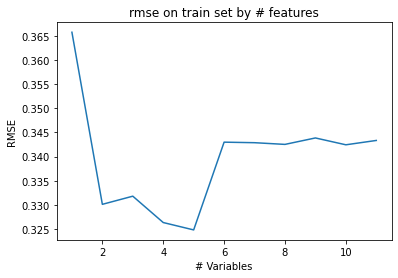

In [6000]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_train_dict.keys()], 
         [float(value) for value in rmse_train_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on train set by # features');

lowest at end but overfitting

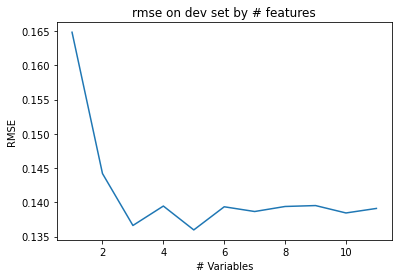

In [6001]:
#Make a graph by #vars
plt.plot([int(key) for key in rmse_dev_dict.keys()], 
         [float(value) for value in rmse_dev_dict.values()],
         )
# Axis labels and title
plt.ylabel('RMSE'); plt.xlabel('# Variables'); plt.title('rmse on dev set by # features');

levels off around 3-4

**verdict: use 3 features**

In [6002]:
include[0:3]

['SEQN', 'LBXPFHS', 'LBXPFNA']

In [6003]:
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred = reg2.predict(X_test[include[0:3]])

In [6004]:
#for later use
reg2 = RandomForestRegressor(random_state = 0)
#fit the regressor with x and y data
reg2.fit(X_train[include[0:3]], Y_train) 
y_pred_forest = reg2.predict(X_test[include[0:3]])
y_pred_series_forest=pd.Series(y_pred_forest,index=X_test.index)

In [6005]:
pred_train = reg2.predict(X_train[include[0:3]])
#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared test set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg2.predict(X_test[include[0:3]])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.8549964841364166
R squared test set -0.239833141324862
MSE training set 0.01315488201874549
MSE test set 0.05641410092165897
RMSE training set 0.11469473404976137
RMSE test set 0.23751652768104153


In [6006]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
455,0.07,0.1039
753,0.07,0.1535
2001,0.07,0.2342
564,0.07,0.1196
1384,0.07,0.1367
...,...,...
860,1.10,0.3213
1081,1.20,0.1574
41,1.30,0.1536
782,1.30,0.3809


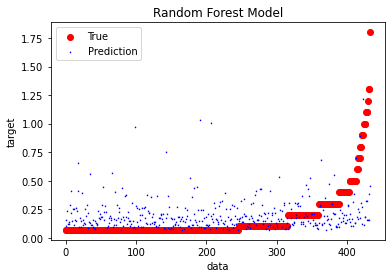

In [6007]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest Model")
plt.legend()
plt.show()

# Ordinary Least Squares Regression

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[OLS Linear Regression Basics with Python’s Scikit-learn](https://python.plainenglish.io/ols-linear-regression-basics-with-pythons-scikit-learn-4ecfe88145b)

In [6008]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_dev)

In [6009]:
reg.coef_

array([ 3.12911368e-06,  5.94002376e-03, -5.20095400e-02,  1.09919770e-02,
       -2.88123333e-02,  1.32992335e+00,  2.06470034e-01,  1.55958635e-01,
       -3.01086796e-02,  1.04785686e-02, -1.40077457e-02,  7.02028015e-03,
        7.02894327e-03, -1.04361820e-01,  2.34861911e-02])

In [6010]:
pred_train = reg.predict(X_train)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev)
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.02611941532421147
R squared dev set -0.0021228309654270916
MSE training set 0.08835154179164516
MSE dev set 0.11149752162678798
RMSE training set 0.2972398724795265
RMSE dev set 0.3339124460495415


In [6011]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.242794
490,0.07,0.144960
1467,0.07,0.227537
2247,0.07,0.206687
116,0.07,0.168946
...,...,...
1635,1.70,0.171761
1187,1.80,0.226998
68,2.90,0.173240
1824,3.00,0.282013


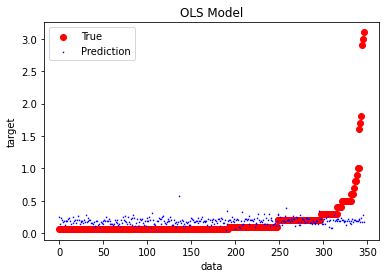

In [6012]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

##bic

In [6013]:
bic_dict={}
for i in X_train.columns:
  reg1 = sm.OLS(Y_train, sm.add_constant(X_train[i])).fit()
  bic_dict[i]=reg1.bic
sorted(bic_dict.items(), key=lambda x: x[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[('LBXPFHS', 606.2726727753213),
 ('LBDPFDEL', 610.5792336102415),
 ('LBXPFNA', 614.4082238747171),
 ('LBDPFHPL', 615.1052798125454),
 ('LBXPFHP', 617.6175101164743),
 ('LBDPFUAL', 619.243207884376),
 ('LBXPFUA', 619.7651672858117),
 ('LBDPFNAL', 620.0144413990331),
 ('LBDPFDOL', 620.0417422971616),
 ('LBXPFDE', 620.386636702114),
 ('LBDPFHSL', 620.4222746808912),
 ('SEQN', 620.5725958504456),
 ('LBXPFBS', 621.6103972875055),
 ('LBXPFDO', 621.8071367437994),
 ('LBDPFBSL', 621.8287428660099)]

In [6014]:
used_OLS=list(np.asarray(sorted(bic_dict.items(), key=lambda x: x[1])[0:5])[:,0])
used_OLS

['LBXPFHS', 'LBDPFDEL', 'LBXPFNA', 'LBDPFHPL', 'LBXPFHP']

In [6015]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred=reg.predict(X_dev[used_OLS])

In [6016]:
pred_train = reg.predict(X_train[used_OLS])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train[used_OLS])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev[used_OLS])
mse_dev =mean_squared_error(Y_dev, pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.02062480248082088
R squared dev set -0.0015718495976158042
MSE training set 0.08885001924760896
MSE dev set 0.11143621870555395
RMSE training set 0.2980772035020608
RMSE dev set 0.33382063852547217


In [6017]:
print(list(X_dev[used_OLS].index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev[used_OLS].index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.226735
490,0.07,0.182560
1467,0.07,0.223190
2247,0.07,0.189223
116,0.07,0.174361
...,...,...
1635,1.70,0.193543
1187,1.80,0.222749
68,2.90,0.178560
1824,3.00,0.261496


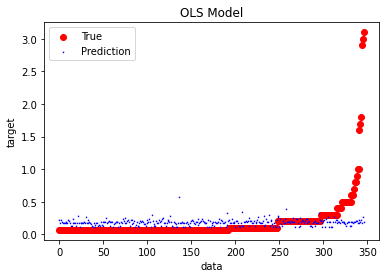

In [6018]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

In [6019]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred=reg.predict(X_test[used_OLS])

In [6020]:
pred_train = reg.predict(X_train[used_OLS])

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared testing set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train[used_OLS])
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test[used_OLS])
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set 0.02062480248082088
R squared testing set 0.028314764154305117
MSE training set 0.08885001924760896
MSE test set 0.04421300506655993
RMSE training set 0.2980772035020608
RMSE test set 0.21026888753821837


In [6021]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
455,0.07,0.185222
753,0.07,0.182682
2001,0.07,0.194471
564,0.07,0.300150
1384,0.07,0.160660
...,...,...
860,1.10,0.167643
1081,1.20,0.208405
41,1.30,0.194958
782,1.30,0.247057


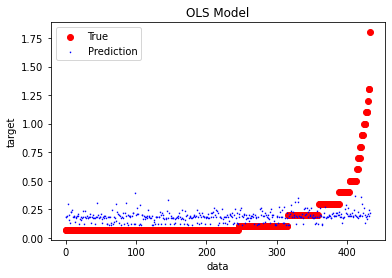

In [6022]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS Model")
plt.legend()
plt.show()

#Neural Network

[sklearn.neural_network.MLPRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [6023]:
from collections import defaultdict

In [6024]:
labels=Y_train
data=X_train_scaled
dev_labels=Y_dev
dev_data=X_dev_scaled

<BarContainer object of 17 artists>

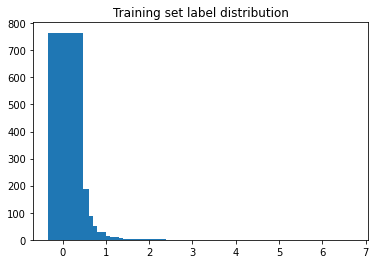

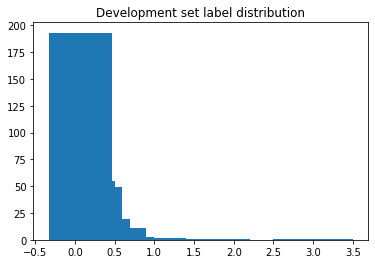

In [6025]:
counts = defaultdict(int)
for label in labels:
 counts[label] += 1

plt.figure()
plt.title("Training set label distribution")
k = counts.keys()
v = counts.values()
plt.bar(list(k), height=list(v))
dev_counts = defaultdict(int)
for label in dev_labels:
 dev_counts[label] += 1
plt.figure()
plt.title("Development set label distribution")
dk = dev_counts.keys()
dv = dev_counts.values()
plt.bar(list(dk), height=list(dv))

In [6026]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [6027]:
reg = MLPRegressor(random_state=0, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

In [6028]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.1216881815986276
R squared dev set -0.07889719695832631
MSE training set 0.07968143584607792
MSE dev set 0.12003953989856961
RMSE training set 0.28227900355158886
RMSE dev set 0.34646722774105143


In [6029]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.384957
490,0.07,0.148045
1467,0.07,0.212860
2247,0.07,0.262102
116,0.07,0.151844
...,...,...
1635,1.70,0.271948
1187,1.80,0.198907
68,2.90,0.201158
1824,3.00,0.429930


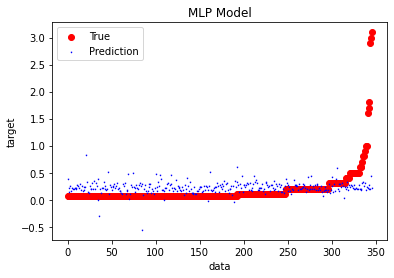

In [6030]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

##Improving model

switch to logistic activation function since logistic regression performed well in classification exercise

In [6031]:
reg = MLPRegressor(random_state=0, activation='logistic', max_iter=500).fit(X_train_scaled, Y_train) #default activation is relu
y_pred=reg.predict(X_dev_scaled)

In [6032]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.02554246713778152
R squared dev set -0.010573148627402329
MSE training set 0.08840388317990884
MSE dev set 0.11243771523096084
RMSE training set 0.29732790514835444
RMSE dev set 0.3353173351184827


**Previously:**

R squared training set 0.5529434724291553

R squared dev set -0.5249424640006883

MSE training set 0.3146636231872482

MSE dev set 0.8556738560447149

RMSE training set 0.5609488596897655

RMSE dev set 0.9250264082958469

definitely better

In [6033]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.261749
490,0.07,0.130568
1467,0.07,0.237948
2247,0.07,0.220801
116,0.07,0.182134
...,...,...
1635,1.70,0.159380
1187,1.80,0.245866
68,2.90,0.188200
1824,3.00,0.305438


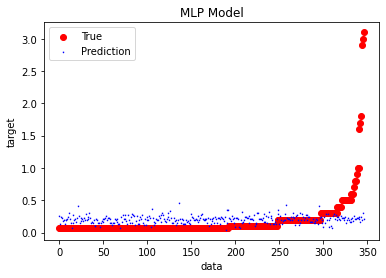

In [6034]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

###DO NOT RUN, THIS CELL WILL TAKE 5 MINUTES OR MORE, trying out 50 different alphas

[How to Tune Algorithm Parameters with Scikit-Learn](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/)

In [6035]:
from sklearn.model_selection import GridSearchCV
model = MLPRegressor(random_state=0, activation='logistic', max_iter=500)
#alphas = np.array(np.linspace(0,1))
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=np.linspace(0,1)))
grid.fit(X_train_scaled, Y_train)
#print(grid)
# summarize the results of the grid search
#print(grid.best_score_)
print(grid.best_estimator_.alpha)

1.0


In [6036]:
grid.best_estimator_.alpha

1.0

In [6037]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

### CONTINUE

In [6038]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=1, max_iter=500).fit(X_train_scaled, Y_train) #default alpha is 0.0001
#y_pred=reg.predict(X_dev_scaled)

In [6039]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.025404456799105635
R squared dev set 0.0013201454135125523
MSE training set 0.08841640363302913
MSE dev set 0.111114451486672
RMSE training set 0.2973489593609319
RMSE dev set 0.3333383438590166


**Previously:**

R squared training set 0.05518449352046939

R squared dev set 0.008328197465698017

MSE training set 0.6650144940904177

MSE dev set 0.5564456726971676

RMSE training set 0.8154842083636064

RMSE dev set 0.7459528622487935

barely improved

i wonder if i should try 0.99999

In [6040]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=0.99, max_iter=500).fit(X_train_scaled, Y_train) #default alpha is 0.0001
y_pred=reg.predict(X_dev_scaled)

In [6041]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.025414570799933034
R squared dev set 0.0012811427881485038
MSE training set 0.08841548607950066
MSE dev set 0.11111879097074587
RMSE training set 0.2973474164668337
RMSE dev set 0.333344852923734


**previously:**

R squared training set 0.04585112416731396

R squared dev set 0.01034546851852447

MSE training set 0.6715838463671122

MSE dev set 0.555313744023655

RMSE training set 0.8195021942417923

RMSE dev set 0.7451937627380244

slightly worse, backtrack

In [6042]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=1, max_iter=500).fit(X_train_scaled, Y_train)
#y_pred=reg.predict(X_dev_scaled)

In [6043]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, max_iter=500).fit(X_train_scaled, Y_train)
y_pred=reg.predict(X_dev_scaled)

In [6044]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.025404456799105635
R squared dev set 0.0013201454135125523
MSE training set 0.08841640363302913
MSE dev set 0.111114451486672
RMSE training set 0.2973489593609319
RMSE dev set 0.3333383438590166


In [6045]:
print(list(X_dev.index)==list(Y_dev.index))
y_pred_series=pd.Series(y_pred,index=X_dev.index)
print(list(y_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=y_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.236105
490,0.07,0.138189
1467,0.07,0.220703
2247,0.07,0.206775
116,0.07,0.171599
...,...,...
1635,1.70,0.162108
1187,1.80,0.232930
68,2.90,0.175455
1824,3.00,0.275822


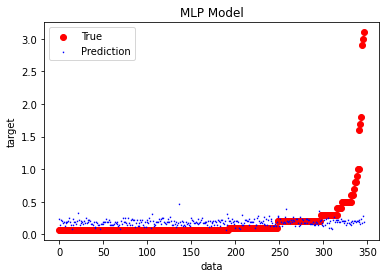

In [6046]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

let's try changing the learning rate

In [6047]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=1, learning_rate='adaptive', max_iter=500).fit(X_train_scaled, Y_train) #default learning rate is constant
#y_pred=reg.predict(X_dev_scaled)

In [6048]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, learning_rate='adaptive', max_iter=500).fit(X_train_scaled, Y_train) #default learning rate is constant
y_pred=reg.predict(X_dev_scaled)

In [6049]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.025404456799105635
R squared dev set 0.0013201454135125523
MSE training set 0.08841640363302913
MSE dev set 0.111114451486672
RMSE training set 0.2973489593609319
RMSE dev set 0.3333383438590166


**previously:**

R squared training set 0.04585112416731396

R squared dev set 0.01034546851852447

MSE training set 0.6715838463671122

MSE dev set 0.555313744023655

RMSE training set 0.8195021942417923

RMSE dev set 0.7451937627380244

no change

we are working with a large dataset, but maybe not too large to try out LBFGS for the solver.

In [6050]:
len(X_train_scaled)

1387

In [6051]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=1, solver='lbfgs', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
#y_pred=reg.predict(X_dev_scaled)

In [6052]:
#if had time to run
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='lbfgs', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
y_pred=reg.predict(X_dev_scaled)

In [6053]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set 0.02681799109034899
R squared dev set -0.002935669072963165
MSE training set 0.08828816621257755
MSE dev set 0.11158795907784053
RMSE training set 0.29713324656217377
RMSE dev set 0.3340478395048238


**previously:**

R squared training set 0.04585112416731396

R squared dev set 0.01034546851852447

MSE training set 0.6715838463671122

MSE dev set 0.555313744023655

RMSE training set 0.8195021942417923

RMSE dev set 0.7451937627380244

horrible idea okay

In [6054]:
#if didn't have time to run
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=1, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
#y_pred=reg.predict(X_dev_scaled)

In [6055]:
#if had time to run 
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train) #default solver is 'adam' aka stochastic gradient-based optimizer
y_pred=reg.predict(X_dev_scaled)

In [6056]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, y_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, y_pred))
print('RMSE dev set', rmse_dev)

R squared training set -0.03770227258017855
R squared dev set -0.013280547689445532
MSE training set 0.09414151708720485
MSE dev set 0.11273894405855048
RMSE training set 0.30682489645920985
RMSE dev set 0.3357662044616022


**previously:**

R squared training set 0.04585112416731396

R squared dev set 0.01034546851852447

MSE training set 0.6715838463671122

MSE dev set 0.555313744023655

RMSE training set 0.8195021942417923

RMSE dev set 0.7451937627380244

improved! different from other groups! noteworthy as to why this could be

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

[sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

##best performing:

###if did not have time

In [6057]:
#reg = MLPRegressor(random_state=0, activation='logistic', alpha=1, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train)
#dev_pred=reg.predict(X_dev_scaled)
#y_pred=reg.predict(X_test_scaled)

###if had time to run long cell:

In [6058]:
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train)
dev_pred=reg.predict(X_dev_scaled)
y_pred=reg.predict(X_test_scaled)

### continue

In [6059]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared dev set',  metrics.r2_score(Y_dev,dev_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# dev data
pred = reg.predict(X_dev_scaled)
mse_dev =mean_squared_error(Y_dev, dev_pred)
print('MSE dev set', mse_dev)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# dev data
rmse_dev = sqrt(mean_squared_error(Y_dev, dev_pred))
print('RMSE dev set', rmse_dev)

R squared training set -0.03770227258017855
R squared dev set -0.013280547689445532
MSE training set 0.09414151708720485
MSE dev set 0.11273894405855048
RMSE training set 0.30682489645920985
RMSE dev set 0.3357662044616022


In [6060]:
print(list(X_dev.index)==list(Y_dev.index))
dev_pred_series=pd.Series(dev_pred,index=X_dev.index)
print(list(dev_pred_series.index)==list(Y_dev.index))
dev_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
dev_Df['Actual']=Y_dev
dev_Df['Prediction']=dev_pred_series
dev_Df=dev_Df.sort_values(by=['Actual'])
dev_Df

True
True


,Actual,Prediction
1797,0.07,0.155972
490,0.07,0.239351
1467,0.07,0.150205
2247,0.07,0.127680
116,0.07,0.197074
...,...,...
1635,1.70,0.202484
1187,1.80,0.247412
68,2.90,0.202615
1824,3.00,0.191716


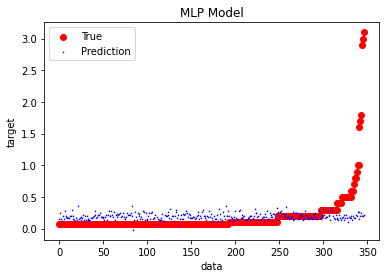

In [6061]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(dev_Df)), dev_Df['Actual'], color="red", label="True")
plt.scatter(range(len(dev_Df)), dev_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

In [6062]:
pred_train = reg.predict(X_train_scaled)

#R-Squared
print('R squared training set', metrics.r2_score(Y_train,pred_train))
print('R squared testing set',  metrics.r2_score(Y_test,y_pred))


#MSE
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', mse_train)

# Test data
pred = reg.predict(X_test_scaled)
mse_test =mean_squared_error(Y_test, y_pred)
print('MSE test set', mse_test)


#RMSE
from math import sqrt
# Training data
rmse_train = sqrt(mean_squared_error(Y_train, pred_train))
print('RMSE training set', rmse_train)

# Test data
rmse_test = sqrt(mean_squared_error(Y_test, y_pred))
print('RMSE test set', rmse_test)

R squared training set -0.03770227258017855
R squared testing set -0.06206564577520313
MSE training set 0.09414151708720485
MSE test set 0.04832543713274569
RMSE training set 0.30682489645920985
RMSE test set 0.2198304736217108


In [6063]:
print(list(X_test.index)==list(Y_test.index))
y_pred_series=pd.Series(y_pred,index=X_test.index)
print(list(y_pred_series.index)==list(Y_test.index))
test_Df= pd.DataFrame(columns = ['Actual', 'Prediction'])
test_Df['Actual']=Y_test
test_Df['Prediction']=y_pred_series
test_Df=test_Df.sort_values(by=['Actual'])
test_Df

True
True


,Actual,Prediction
455,0.07,0.269167
753,0.07,0.172752
2001,0.07,0.146865
564,0.07,0.192503
1384,0.07,0.267929
...,...,...
860,1.10,0.221875
1081,1.20,0.161280
41,1.30,0.269642
782,1.30,0.178006


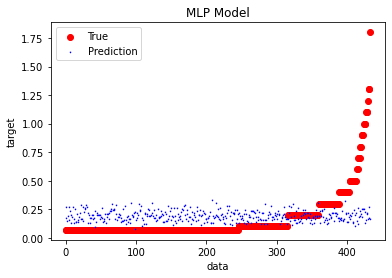

In [6064]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(test_Df)), test_Df['Actual'], color="red", label="True")
plt.scatter(range(len(test_Df)), test_Df['Prediction'], color="blue", label="Prediction",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("MLP Model")
plt.legend()
plt.show()

# All plots

In [6065]:
test_DF= pd.DataFrame(columns = ['Actual', 'Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
test_DF['Actual']=Y_test
#lasso
reg = Lasso(alpha=model_lasso.alpha_)
reg.fit(X_train_scaled, Y_train)
y_pred_lasso=reg.predict(X_test_scaled)
y_pred_series_lasso=pd.Series(y_pred_lasso,index=X_test.index)
test_DF['Lasso']=y_pred_series_lasso

#Decision Tree
reg = DecisionTreeRegressor(random_state = 0,max_depth=6) 
reg.fit(X_train, Y_train)
y_pred_tree = reg.predict(X_test)
y_pred_series_tree=pd.Series(y_pred_tree,index=X_test.index)
test_DF['Decision Tree']=y_pred_series_tree

#Random Forest 
#y_pred_forest
#y_pred_series_forest
test_DF['Random Forest']=y_pred_series_forest

#OLS
reg=LinearRegression()
reg.fit(X_train[used_OLS],Y_train)
y_pred_OLS=reg.predict(X_test[used_OLS])
y_pred_series_OLS=pd.Series(y_pred_OLS,index=X_test.index)
test_DF['OLS']=y_pred_series_OLS

#Neural Newtwork
reg = MLPRegressor(random_state=0, activation='logistic', alpha=grid.best_estimator_.alpha, solver='sgd', max_iter=500).fit(X_train_scaled, Y_train)
y_pred_NN=reg.predict(X_test_scaled)
y_pred_series_NN=pd.Series(y_pred_NN,index=X_test.index)
test_DF['Neural Network']=y_pred_NN

In [6066]:
test_DF

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
2199,0.30,0.192589,0.172178,0.1887,0.178681,0.121454
861,0.20,0.188432,0.172178,0.1405,0.180780,0.194033
1312,0.07,0.194488,0.172178,0.2533,0.187200,0.173512
2123,0.07,0.194327,0.172178,0.1461,0.181146,0.119126
1885,0.10,0.218960,0.263316,0.3372,0.210063,0.130031
...,...,...,...,...,...,...
1122,0.10,0.159178,0.181534,0.1212,0.146681,0.201127
513,0.07,0.129418,0.099747,0.0799,0.119863,0.231031
1705,0.07,0.389542,1.700000,0.9694,0.395492,0.077679
2331,0.07,0.130548,0.099747,0.1278,0.113462,0.221259


In [6067]:
test_DF.to_csv('test_outside_run2.csv')

In [6068]:
plot_df=test_DF.copy()
plot_df=plot_df.sort_values(by=["Actual"])

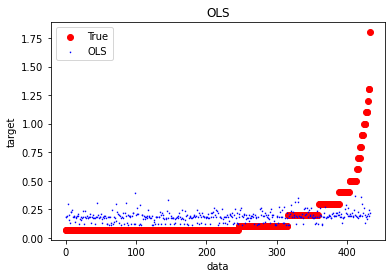

In [6069]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['OLS'], color="blue", label="OLS",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS")
plt.legend()
plt.show()

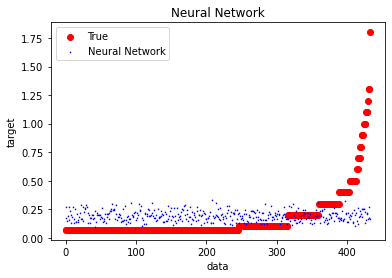

In [6070]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Neural Network'], color="blue", label="Neural Network",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Neural Network")
plt.legend()
plt.show()

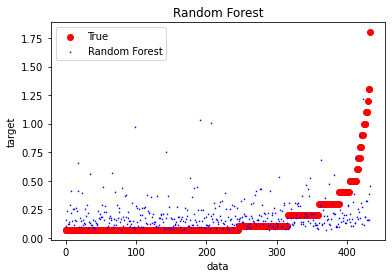

In [6071]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Random Forest'], color="blue", label="Random Forest",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest")
plt.legend()
plt.show()

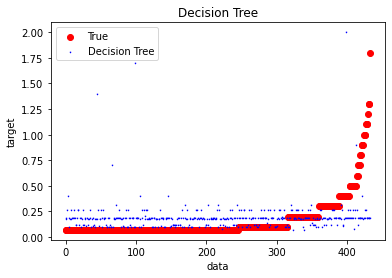

In [6072]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True")
plt.scatter(range(len(plot_df)), plot_df['Decision Tree'], color="blue", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree")
plt.legend()
plt.show()

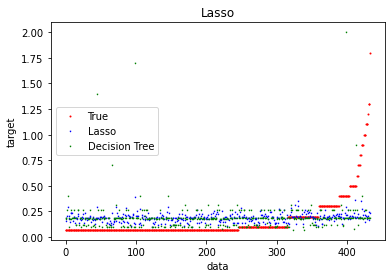

In [6073]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plot_df)), plot_df['Actual'], color="red", label="True", s=1)
plt.scatter(range(len(plot_df)), plot_df['Lasso'], color="blue", label="Lasso",marker="v",s=0.5)
plt.scatter(range(len(plot_df)), plot_df['Decision Tree'], color="g", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso")
plt.legend()
plt.show()

doing a difference instead of got it or not since it is never actually exact

In [6074]:
diff_df=pd.DataFrame(columns = ['Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
for i in diff_df.columns:
  diff_df[i]= abs((test_DF['Actual']-test_DF[i]))
display(diff_df)

,Lasso,Decision Tree,Random Forest,OLS,Neural Network
2199,0.107411,0.127822,0.1113,0.121319,0.178546
861,0.011568,0.027822,0.0595,0.019220,0.005967
1312,0.124488,0.102178,0.1833,0.117200,0.103512
2123,0.124327,0.102178,0.0761,0.111146,0.049126
1885,0.118960,0.163316,0.2372,0.110063,0.030031
...,...,...,...,...,...
1122,0.059178,0.081534,0.0212,0.046681,0.101127
513,0.059418,0.029747,0.0099,0.049863,0.161031
1705,0.319542,1.630000,0.8994,0.325492,0.007679
2331,0.060548,0.029747,0.0578,0.043462,0.151259


In [6075]:
diff_dict={}
for i in diff_df.columns:
  x= np.mean(diff_df[i])
  diff_dict[i]=x
  print(" average difference from actual = {:.3f} ".format(x) + i)

 average difference from actual = 0.138 Lasso
 average difference from actual = 0.144 Decision Tree
 average difference from actual = 0.152 Random Forest
 average difference from actual = 0.136 OLS
 average difference from actual = 0.147 Neural Network


In [6076]:
performance=list(np.asarray(sorted(diff_dict.items(), key=lambda x: x[1]))[:,0])
print(performance)

['OLS', 'Lasso', 'Decision Tree', 'Neural Network', 'Random Forest']


now lets look at rounding all the predictions to the fixed values for detection levels

In [6077]:
levels=Y_train.value_counts().index.tolist()
levels

[0.07,
 0.2,
 0.1,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.9,
 0.8,
 1.0,
 1.3,
 1.1,
 1.5,
 1.7,
 1.6,
 1.4,
 1.2,
 2.0,
 2.2,
 1.8,
 2.3,
 6.3]

In [6078]:
group_df=test_DF.copy()
for i in group_df.drop(columns="Actual").columns:
  for j,k in zip(group_df[i],group_df[i].index):
    dict1={}
    for a in levels:
      dict1[a]=abs(a-j)
    b=min(dict1, key=dict1.get)
    group_df[i][k]=b

In [6079]:
group_df

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
2199,0.30,0.2,0.2,0.20,0.2,0.10
861,0.20,0.2,0.2,0.10,0.2,0.20
1312,0.07,0.2,0.2,0.30,0.2,0.20
2123,0.07,0.2,0.2,0.10,0.2,0.10
1885,0.10,0.2,0.3,0.30,0.2,0.10
...,...,...,...,...,...,...
1122,0.10,0.2,0.2,0.10,0.1,0.20
513,0.07,0.1,0.1,0.07,0.1,0.20
1705,0.07,0.4,1.7,1.00,0.4,0.07
2331,0.07,0.1,0.1,0.10,0.1,0.20


In [6080]:
match_df=group_df.copy()
for i in match_df.columns:
  match_df[i]= (match_df['Actual'] == match_df[i])
display(match_df)

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
2199,True,False,False,False,False,False
861,True,False,False,False,False,False
1312,True,False,False,False,False,False
2123,True,False,False,False,False,False
1885,True,False,False,False,False,False
...,...,...,...,...,...,...
1122,True,False,False,False,False,False
513,True,False,False,False,False,False
1705,True,False,False,True,False,False
2331,True,False,False,False,False,False


:(( okay let's do difference again

In [6081]:
diff_group_df=pd.DataFrame(columns = ['Lasso','Decision Tree','Random Forest','OLS','Neural Network'])
for i in diff_group_df.columns:
  diff_group_df[i]= abs((group_df['Actual']-group_df[i]))
display(diff_group_df)

,Lasso,Decision Tree,Random Forest,OLS,Neural Network
2199,0.10,0.10,0.10,0.10,0.20
861,0.00,0.00,0.10,0.00,0.00
1312,0.13,0.13,0.23,0.13,0.13
2123,0.13,0.13,0.03,0.13,0.03
1885,0.10,0.20,0.20,0.10,0.00
...,...,...,...,...,...
1122,0.10,0.10,0.00,0.00,0.10
513,0.03,0.03,0.00,0.03,0.13
1705,0.33,1.63,0.93,0.33,0.00
2331,0.03,0.03,0.03,0.03,0.13


In [6082]:
diff_dict_levels={}
for i in diff_group_df.columns:
  x= np.mean(diff_group_df[i])
  diff_dict_levels[i]=x
  print(" average difference from actual = {:.3f} ".format(x) + i)

 average difference from actual = 0.136 Lasso
 average difference from actual = 0.150 Decision Tree
 average difference from actual = 0.152 Random Forest
 average difference from actual = 0.135 OLS
 average difference from actual = 0.147 Neural Network


In [6083]:
performance_levels=list(np.asarray(sorted(diff_dict_levels.items(), key=lambda x: x[1]))[:,0])
print(performance_levels)

['OLS', 'Lasso', 'Neural Network', 'Decision Tree', 'Random Forest']


In [6084]:
plotting_df=group_df.copy()
plotting_df=plotting_df.sort_values(by=["Actual"])

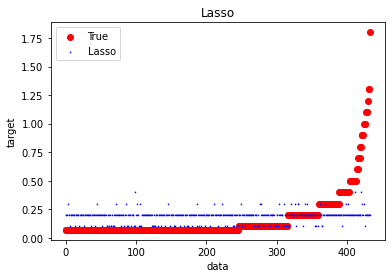

In [6085]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Lasso'], color="blue", label="Lasso",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Lasso")
plt.legend()
plt.show()

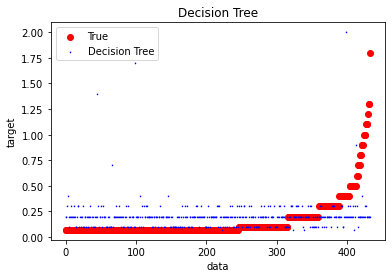

In [6086]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Decision Tree'], color="blue", label="Decision Tree",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Decision Tree")
plt.legend()
plt.show()

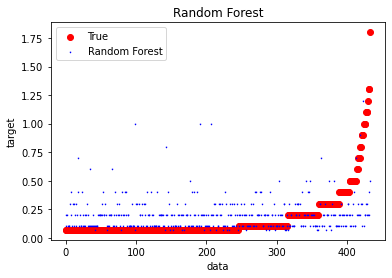

In [6087]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Random Forest'], color="blue", label="Random Forest",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Random Forest")
plt.legend()
plt.show()

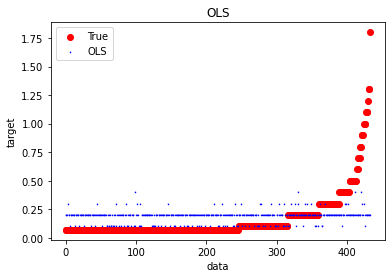

In [6088]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['OLS'], color="blue", label="OLS",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("OLS")
plt.legend()
plt.show()

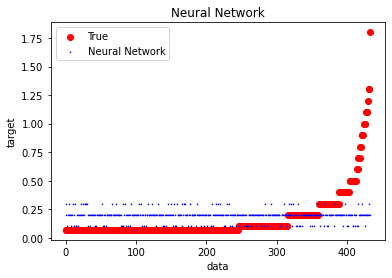

In [6089]:
# Plot the results
plt.figure()
#plotting x as range(len(Y_test)) because we can't use a dataframe as the X axis and it doesn't really matter what we use as long as everything is included in Y and indexed the same order
plt.scatter(range(len(plotting_df)), plotting_df['Actual'], color="red", label="True")
plt.scatter(range(len(plotting_df)), plotting_df['Neural Network'], color="blue", label="Neural Network",marker="v",s=0.5)
plt.xlabel('data')
plt.ylabel("target")
plt.title("Neural Network")
plt.legend()
plt.show()

#**make a table or plot: take the 125 that are -1.609438 take the means and stdvs for those predictions. for each one of the numbers. summarize in table: if this is the actual value... here is my prediction mean and std (if plot could do an error bar, but table preferred)**

In [ ]:
explore_Df=test_DF.copy()
display(explore_Df)

,Actual,Lasso,Decision Tree,Random Forest,OLS,Neural Network
503,-2.302585,-1.677693,-1.737012,-1.599087,-1.736068,-1.685613
1974,-2.659260,-1.743882,-1.737012,-1.438820,-1.825662,-1.792303
769,-2.659260,-1.571144,-1.517751,-1.615520,-1.518669,-1.575019
1495,-2.659260,-1.566738,-1.517751,-1.845337,-1.518669,-1.530124
688,-1.203973,-1.674928,-1.517751,-1.615520,-1.568565,-1.528442
...,...,...,...,...,...,...
1674,-1.609438,-1.786378,-2.307636,-0.593742,-1.948732,-1.835919
1591,-2.302585,-1.832073,-1.776731,-2.076945,-1.853615,-1.867549
352,-1.609438,-1.527591,-1.517751,-1.225501,-1.518669,-1.486341
574,-1.609438,-1.572195,-1.517751,-1.615520,-1.518669,-1.557537


In [ ]:
# explore_Df=explore_Df.drop(explore_Df.index[explore_Df['Actual'] != -1.6094379124341003])
#not working, just find an index where it is that to compare

In [ ]:
sr=Y_train.value_counts()
sr_dex=sr.index
sr

-1.609438    365
-2.659260    275
-2.302585    265
-1.203973    183
-0.916291     81
-0.693147     55
-0.510826     34
-0.223144     16
-0.356675     14
-0.105361     12
 0.336472      6
 0.262364      6
 0.095310      6
 0.182322      5
 0.587787      4
 0.000000      4
 0.470004      3
 1.280934      3
 0.530628      3
 0.916291      2
 0.405465      2
 0.832909      2
 2.694627      1
 1.547563      1
 1.098612      1
 1.252763      1
 1.568616      1
 3.937691      1
 0.641854      1
 0.788457      1
 1.193922      1
 1.504077      1
 0.741937      1
 0.993252      1
 1.589235      1
Name: LBXPFDE, dtype: int64

i care about the first 8

**will have to rewrite numbers on left side each time**

In [ ]:
df365 = pd.DataFrame([[sr_dex[0], sr.values[0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df275 = pd.DataFrame([[sr_dex[1], sr.values[1], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df265 = pd.DataFrame([[sr_dex[2], sr.values[2], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df183 = pd.DataFrame([[sr_dex[3], sr.values[3], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df81 = pd.DataFrame([[sr_dex[4], sr.values[4], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df55 = pd.DataFrame([[sr_dex[5], sr.values[5], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df34 = pd.DataFrame([[sr_dex[6], sr.values[6], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])


df16 = pd.DataFrame([[sr_dex[7], sr.values[7], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns=['detection level', 'no of samples in training', 'Lasso mean',	'Lasso std', 'Decision Tree mean',	'Decision Tree std',
                                   'Random Forest mean',	'Random Forest std',	'OLS mean',	'OLS std',	'Neural Network mean',	'Neural Network std'])

**will have to rewrite numbers on left side each time**

In [ ]:
Df365 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[0]].tolist()[0]]]
Df275 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[1]].tolist()[0]]]
Df265 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[2]].tolist()[0]]]
Df183 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[3]].tolist()[0]]]
Df81 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[4]].tolist()[0]]]
Df55 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[5]].tolist()[0]]]
Df34 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[6]].tolist()[0]]]
Df16 = explore_Df[explore_Df['Actual'] == explore_Df['Actual'][explore_Df.index[explore_Df['Actual'] == sr_dex[7]].tolist()[0]]]

**will have to rewrite numbers on left side each time**

In [ ]:
L1=['Lasso', 'Decision Tree', 'Random Forest', 'OLS', 'Neural Network']

L2=[Df365, Df275, Df265, Df183, Df81, Df55, Df34, Df16]
L3=[df365, df275, df265, df183, df81, df55, df34, df16]

for old,new in zip(L2,L3):
  for col in L1:
    new[col+' mean']=np.average(old[col])
    new[col+' std']=np.std(old[col])

In [ ]:
concatenated_dataframes = pd.concat(L3, axis=0)
display(concatenated_dataframes)

,detection level,no of samples in training,Lasso mean,Lasso std,Decision Tree mean,Decision Tree std,Random Forest mean,Random Forest std,OLS mean,OLS std,Neural Network mean,Neural Network std
0,-1.609438,365,-1.672405,0.105421,-1.692616,0.241668,-1.630345,0.380022,-1.680683,0.136233,-1.683105,0.126770
0,-2.659260,275,-1.654775,0.121522,-1.722146,0.243254,-1.666176,0.346214,-1.666034,0.128768,-1.655374,0.135504
0,-2.302585,265,-1.669630,0.110086,-1.722988,0.305026,-1.696592,0.397242,-1.687924,0.119058,-1.679661,0.127500
0,-1.203973,183,-1.647868,0.096694,-1.628367,0.366173,-1.689522,0.306669,-1.645100,0.136341,-1.641036,0.120566
0,-0.916291,81,-1.627673,0.085847,-1.631057,0.229916,-1.657533,0.522614,-1.642868,0.109741,-1.623492,0.123031
0,-0.693147,55,-1.635972,0.109963,-1.619813,0.244673,-1.635202,0.352206,-1.660189,0.115613,-1.645011,0.124795
0,-0.510826,34,-1.629633,0.120929,-1.684462,0.265402,-1.681279,0.379437,-1.606206,0.169398,-1.620586,0.129196
0,-0.223144,16,-1.620505,0.101063,-1.450580,0.379629,-1.591607,0.452035,-1.614798,0.082743,-1.591580,0.112044


In [ ]:
concatenated_dataframes.to_csv('levels_breakdown_outside_run10.csv')